7
Recognition error rate =  0.345


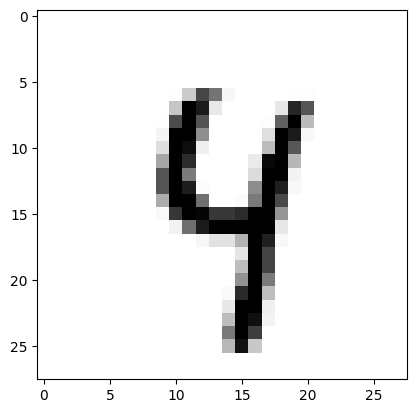

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01):
        self.w1 = np.random.normal(0.0, pow(input_dim, -0.5), (input_dim, hidden_dim))
        self.w2 = np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim, output_dim))
        self.h = np.zeros((1, hidden_dim))
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.theta = 0

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self, x):
        a = x.astype(float)
        b = self.w1.astype(float)
        self.h = self.sigmoid(np.dot(a, b) - self.theta)
        return self.sigmoid(np.dot(self.h, self.w2) - self.theta)
    
    def feedforward_upto_hidden(self, x):
        return self.sigmoid(np.dot(x, self.w1) - self.theta)
    
    def backprop_w2(self, g, y):
        q = (-2) * (g-y) * y * (1-y)
        return np.dot(self.h.reshape(self.hidden_dim,1), q.reshape(1,self.output_dim))
    
    def backprop_w1(self, g, y, x):
        q1 = (-2) * (g-y) * y * (1-y)
        q2 = np.dot(self.w2, q1)
        return np.dot(x.reshape(self.input_dim, 1), q2 * self.h * (1-self.h).reshape(1,self.hidden_dim))
    
    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T

        self.w1 = self.w1 - self.lr*self.backprop_w1(g, y, x)
        self.w2 = self.w2 - self.lr*self.backprop_w2(g, y)


input_dim = 784
hidden_dim = 100
output_dim = 10
epochs = 10

pct = Perceptron(input_dim, hidden_dim, output_dim, 0.1)

training_dataset_file = open("mnist_train_200.csv", 'r')
#training_dataset_file = open("mnist_train.csv", 'r')t

training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
input_list = list()

for k in range(epochs):
    pct.lr = pct.lr * 0.8

    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
        input_list.append(inputs)

        targets = np.zeros(output_dim) + 0.01
        targets[int(all_values[0])] = 0.99

        pct.training(inputs, targets)

test_dataset_file = open("mnist_test_200.csv", 'r')
#test_dataset_file = open("mnist_test.csv", 'r')

test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()
output_list = list()

all_values = test_dataset_list[0].split(',')
print(all_values[0])
pct.feedforward(np.asfarray(all_values[1:]))

success = 0
failure = 0

for i in test_dataset_list:
    all_values = i.split(',')
    target = int(all_values[0])

    all_values_normalized = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    prediction_list = pct.feedforward(np.asfarray(all_values_normalized))
    prediction = np.argmax(prediction_list)

    if target == prediction:
        success += 1
    else:
        failure += 1
        #print("Prediction fails. (target, prediction) = ", target, prediction)
        #print("Prediction list = ", prediction_list)
        im_array = np.asfarray(all_values_normalized).reshape((28,28))
        plt.imshow(im_array, cmap='Greys', interpolation='None')

print("Recognition error rate = ", (failure/(success+failure)))